In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import sys
%cd ..
sys.path.append(os.path.join(os.getcwd(),'ultralytics/'))

/Users/mahfujurrahman/Desktop


/Users/mahfujurrahman/Desktop/Thesis/thesis/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
intermediate_features=[]
def hook(module, input_layer, output_layer):
    print(module)
    intermediate_features.append(output_layer)
    
def feature_extraction(model, img, layer):
    global intermediate_features
    intermediate_features=[]
    
    hook_val = model.model.model[layer].register_forward_hook(hook)
    print(hook_val)
    
    with torch.no_grad():
        model(img)
    hook_val.remove()
    return intermediate_features[-1]

def image_preprocessing(image):
    transform= transforms.Compose([
        transforms.Resize((640,640)),
        transforms.ToTensor(),
        transforms.Normalize(mean=0., std=1.)
    ])
    img= Image.open(image)
    img =  transform(img)
    img = img.unsqueeze(0)
    
    return img

In [3]:
import torch
from ultralytics import YOLO
from torchvision import transforms

In [4]:
model=YOLO('Graph/properties/Test_3/weights/best.pt')
model.info(detailed=False)

YOLOv8n-CA summary: 241 layers, 3114019 parameters, 0 gradients


(241, 3114019, 0, 0.0)

In [5]:
img=image_preprocessing('Temp/000110.jpg')

In [10]:
features=feature_extraction(model, img, 13)


ChannelAttention(
  (pool): AdaptiveAvgPool2d(output_size=1)
  (fc): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
  (act): Sigmoid()
)
0: 640x640 3 vessels, 119.3ms
Speed: 0.0ms preprocess, 119.3ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)


In [11]:
features.shape

torch.Size([1, 128, 40, 40])

In [18]:
#dual_img= Image.open('Temp/VV&VH.png')
single_img= Image.open('Temp/000110.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mahfujurrahman/Desktop/Thesis/Temp/000110.jpg'

In [43]:
features.shape

torch.Size([1, 128, 40, 40])

In [19]:
imgs=[dual_img, single_img]

In [7]:
import seaborn as sns

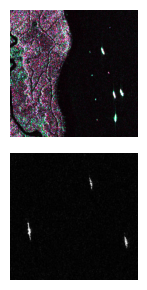

In [31]:
fig = plt.figure(figsize=(3, 3))
i=0
for img in imgs:
    j=10
    ax = fig.add_subplot(2, 1, i+1) 
    t=np.array(img)
    plt.imshow(t)  
    #ax.set_title(f' {i+1}')  
    ax.axis('off') 
    i= i+1

# Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig('s_img.png')
plt.show()


ChannelAttention(
  (pool): AdaptiveAvgPool2d(output_size=1)
  (fc): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
  (act): Sigmoid()
)
0: 640x640 3 vessels, 117.4ms
Speed: 0.3ms preprocess, 117.4ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)


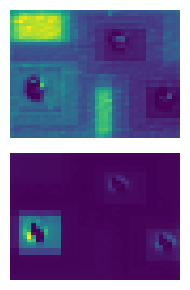

In [9]:
fig = plt.figure(figsize=(2, 3))
features=feature_extraction(model, img, 13)
for i in range(0,2):
    j=10
    data = features[0][i+j].cpu().numpy() 
    ax = fig.add_subplot(2, 1, i+1)  
    sns.heatmap(data, cmap='viridis',cbar=False, annot=False, ax=ax)  
    #ax.set_title(f' {i+1}')  
    ax.axis('off')  

# Adjust layout
plt.tight_layout()

plt.savefig('25.png')
# Show the plot
plt.show()

In [ ]:
data.shape

In [ ]:
model.info(detailed=True)

In [18]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
   

In [ ]:
features.shape

In [23]:
model1=YOLO('yolo8n-ECA.yaml')

FileNotFoundError: 'yolo8n-ECA.yaml' does not exist

In [16]:
model.predict(source=single_im)


1/1: 0... Success ✅ (inf frames of shape 1280x720 at 30.00 FPS)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 384x640 (no detections), 326.3ms
0: 384x640 (no detections), 67.0ms
0: 384x640 (no detections), 54.3ms
0: 384x640 (no detections), 55.7ms
0: 384x640 (no detections), 56.5ms
0: 384x640 (no detections), 62.0ms
0: 384x640 (no detections), 61.6ms
0: 384x640 (no detections), 57.8ms
0: 384x640 (no detections), 60.4ms
0: 384x640 (no detections), 64.6ms
0: 384x640 (no detections), 58.0ms
0: 38

0: 384x640 (no detections), 81.1ms
0: 384x640 (no detections), 74.2ms
0: 384x640 (no detections), 71.6ms
0: 384x640 (no detections), 79.2ms
0: 384x640 (no detections), 72.8ms
0: 384x640 (no detections), 72.4ms
0: 384x640 (no detections), 70.2ms
0: 384x640 (no detections), 82.2ms
0: 384x640 (no detections), 76.2ms
0: 384x640 (no detections), 72.1ms
0: 384x640 (no detections), 80.5ms
0: 384x640 (no detections), 74.6ms
0: 384x640 (no detections), 77.3ms
0: 384x640 (no detections), 89.6ms
0: 384x640 (no detections), 86.2ms
0: 384x640 (no detections), 83.6ms
0: 384x640 (no detections), 83.8ms
0: 384x640 (no detections), 83.6ms
0: 384x640 (no detections), 85.8ms
0: 384x640 (no detections), 80.6ms
0: 384x640 (no detections), 78.2ms
0: 384x640 (no detections), 85.2ms
0: 384x640 (no detections), 72.7ms
0: 384x640 (no detections), 75.6ms
0: 384x640 (no detections), 76.3ms
0: 384x640 (no detections), 66.4ms
0: 384x640 (no detections), 68.7ms
0: 384x640 (no detections), 70.8ms
0: 384x640 (no detec

0: 384x640 (no detections), 71.1ms
0: 384x640 (no detections), 63.7ms
0: 384x640 (no detections), 76.9ms
0: 384x640 (no detections), 63.6ms
0: 384x640 (no detections), 69.5ms
0: 384x640 (no detections), 74.5ms
0: 384x640 (no detections), 67.3ms
0: 384x640 (no detections), 67.2ms
0: 384x640 (no detections), 60.5ms
0: 384x640 (no detections), 69.8ms
0: 384x640 (no detections), 65.6ms
0: 384x640 (no detections), 71.4ms
0: 384x640 (no detections), 77.0ms
0: 384x640 (no detections), 61.9ms
0: 384x640 (no detections), 64.3ms
0: 384x640 (no detections), 61.4ms
0: 384x640 (no detections), 73.5ms
0: 384x640 (no detections), 68.7ms
0: 384x640 (no detections), 64.3ms
0: 384x640 (no detections), 72.0ms
0: 384x640 (no detections), 65.4ms
0: 384x640 (no detections), 63.7ms
0: 384x640 (no detections), 64.6ms
0: 384x640 (no detections), 84.0ms
0: 384x640 (no detections), 61.8ms
0: 384x640 (no detections), 62.3ms
0: 384x640 (no detections), 69.5ms
0: 384x640 (no detections), 66.9ms
0: 384x640 (no detec

0: 384x640 (no detections), 59.6ms
0: 384x640 (no detections), 58.3ms
0: 384x640 (no detections), 63.2ms
0: 384x640 (no detections), 59.6ms
0: 384x640 (no detections), 58.6ms
0: 384x640 (no detections), 62.2ms
0: 384x640 (no detections), 68.3ms
0: 384x640 (no detections), 58.6ms
0: 384x640 (no detections), 62.6ms
0: 384x640 (no detections), 66.7ms
0: 384x640 (no detections), 62.6ms
0: 384x640 (no detections), 59.4ms
0: 384x640 (no detections), 66.4ms
0: 384x640 (no detections), 65.7ms
0: 384x640 (no detections), 61.9ms
0: 384x640 (no detections), 58.7ms
0: 384x640 (no detections), 64.7ms
0: 384x640 (no detections), 64.3ms
0: 384x640 (no detections), 60.4ms
0: 384x640 (no detections), 60.8ms
0: 384x640 (no detections), 58.8ms
0: 384x640 (no detections), 65.2ms
0: 384x640 (no detections), 58.1ms
0: 384x640 (no detections), 60.8ms
0: 384x640 (no detections), 62.1ms
0: 384x640 (no detections), 64.6ms
0: 384x640 (no detections), 63.3ms
0: 384x640 (no detections), 59.9ms
0: 384x640 (no detec

0: 384x640 (no detections), 72.8ms
0: 384x640 (no detections), 68.5ms
0: 384x640 (no detections), 76.4ms
0: 384x640 (no detections), 64.3ms
0: 384x640 (no detections), 64.2ms
0: 384x640 (no detections), 66.9ms
0: 384x640 (no detections), 69.5ms
0: 384x640 (no detections), 63.7ms
0: 384x640 (no detections), 66.0ms
0: 384x640 (no detections), 64.5ms
0: 384x640 (no detections), 68.9ms
0: 384x640 (no detections), 68.4ms
0: 384x640 (no detections), 61.3ms
0: 384x640 (no detections), 69.5ms
0: 384x640 (no detections), 65.1ms
0: 384x640 (no detections), 59.3ms
0: 384x640 (no detections), 59.8ms
0: 384x640 (no detections), 66.9ms
0: 384x640 (no detections), 57.9ms
0: 384x640 (no detections), 56.1ms
0: 384x640 (no detections), 59.2ms
0: 384x640 (no detections), 70.5ms
0: 384x640 (no detections), 63.5ms
0: 384x640 (no detections), 68.6ms
0: 384x640 (no detections), 73.6ms
0: 384x640 (no detections), 59.9ms
0: 384x640 (no detections), 70.3ms
0: 384x640 (no detections), 58.1ms
0: 384x640 (no detec


KeyboardInterrupt



In [20]:
!pwd

/Users/mahfujurrahman/Desktop
